In [5]:
from povvecht import io
import pandas as pd
from hkvtools.waterstandstatistiek import WaterstandStatistiek

import matplotlib.pyplot as plt

In [6]:
path = r'r:\pr\3694_10\sbkRIV25209\Model\POVVecht_GRADE50000_v3\hisfiles\02002_flowhis.his'


In [7]:
def get_sobek_time_series(hisfilepath, location="VEN_OV_36_60_9610.00", parameter='Discharge Total'):
    """
    Sub function for the processing
    
    Parameters
    ----------
    hisfilepath : str
        path to his file to read
    locations : str
        Location to read the output data (default="VEN_OV_36_60_9610.00")
    """

    # Read meta data
    rehis = WaterstandStatistiek()
    rehis.LeesMetadata(hisfilepath)
    locaties = rehis.KrijgLokaties()
    parameters = rehis.KrijgParameters()
    param_dict = {p.strip() : p for p in parameters}
    if not isinstance(parameter, list):
        parameter = [parameter]
    for param in parameter:
        if param not in param_dict.keys():
            raise KeyError('Parameter "{}" not present. Choose from: {}'.format(parameter, ', '.join(list(param_dict.keys()))))

    # Read values
    df_rehis=rehis.MultiWaardenArary(
        locaties,
        [param_dict[param] for param in parameter],
        startMMdd=(1, 1),
        endMMdd=(12, 31),
        jaarmax_as='none',
        drop_lege_jaren=False
    )

    return df_rehis.loc[:, ([param_dict[param] for param in parameter], location)]

In [8]:
wlev = get_sobek_time_series(
    path, location=['VEN_OV_0_2_52.00', 'VEN_OV_36_60_9610.00'], parameter=['Water level', 'Discharge Total'])

wlev.columns = pd.MultiIndex.from_arrays(
    [[val.strip() for val in wlev.columns.get_level_values(0)], wlev.columns.get_level_values(1)])
# disch = io.get_sobek_time_series(path, location='VEN_OV_0_2_52.00', parameter=)

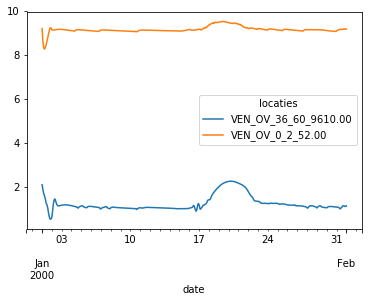

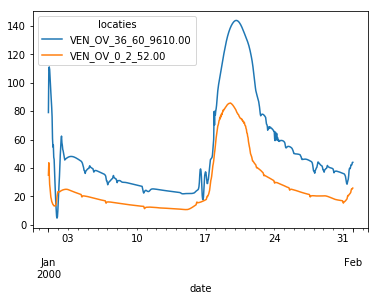

In [9]:
wlev['Water level'].plot()
wlev['Discharge Total'].plot()

In [10]:
wlev.columns

MultiIndex(levels=[['Discharge Total', 'Water level'], ['VEN_OV_0_2_52.00', 'VEN_OV_36_60_9610.00']],
           labels=[[1, 1, 0, 0], [1, 0, 1, 0]],
           names=[None, 'locaties'])

In [15]:
maxima

Water level                       Discharge Total  \
locaties VEN_OV_36_60_9610.00 VEN_OV_0_2_52.00 VEN_OV_36_60_9610.00   
2001                  2.27251          9.52941              143.941   
2002                      NaN              NaN                  NaN   
2003                      NaN              NaN                  NaN   
2004                      NaN              NaN                  NaN   
2005                      NaN              NaN                  NaN   
2006                      NaN              NaN                  NaN   
2007                      NaN              NaN                  NaN   
2008                      NaN              NaN                  NaN   
2009                      NaN              NaN                  NaN   
2010                      NaN              NaN                  NaN   
2011                      NaN              NaN                  NaN   
2012                      NaN              NaN                  NaN   
2013                      NaN              NaN                  NaN   
2014                      NaN              NaN                  NaN   
2015                      NaN              NaN                  NaN   
2016                      NaN              NaN                  NaN   
2017                      NaN              NaN                  NaN   
2018                      NaN              NaN                  NaN   
2019                      NaN              NaN                  NaN   
2020                      NaN              NaN                  NaN   
2021                      NaN              NaN                  NaN   
2022                      NaN              NaN                  NaN   
2023                      NaN              NaN                  NaN   
2024                      NaN              NaN                  NaN   
2025                      NaN              NaN                  NaN   
2026                      NaN              NaN                  NaN   
2027                      NaN              NaN                  NaN   
2028                      NaN              NaN                  NaN   
2029                      NaN              NaN                  NaN   
2030                      NaN              NaN                  NaN   
...                       ...              ...                  ...   
51972                     NaN              NaN                  NaN   
51973                     NaN              NaN                  NaN   
51974                     NaN              NaN                  NaN   
51975                     NaN              NaN                  NaN   
51976                     NaN              NaN                  NaN   
51977                     NaN              NaN                  NaN   
51978                     NaN              NaN                  NaN   
51979                     NaN              NaN                  NaN   
51980                     NaN              NaN                  NaN   
51981                     NaN              NaN                  NaN   
51982                     NaN              NaN                  NaN   
51983                     NaN              NaN                  NaN   
51984                     NaN              NaN                  NaN   
51985                     NaN              NaN                  NaN   
51986                     NaN              NaN                  NaN   
51987                     NaN              NaN                  NaN   
51988                     NaN              NaN                  NaN   
51989                     NaN              NaN                  NaN   
51990                     NaN              NaN                  NaN   
51991                     NaN              NaN                  NaN   
51992                     NaN              NaN                  NaN   
51993                     NaN              NaN                  NaN   
51994                     NaN              NaN                  NaN   
51995                     NaN             